In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)
print(X_train.shape)

(3709, 50, 1)


In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : {}'.format(time.time() - start))

compilation time : 0.036126136779785156


In [4]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 4s - loss: 0.0024 - val_loss: 5.9434e-04


yo


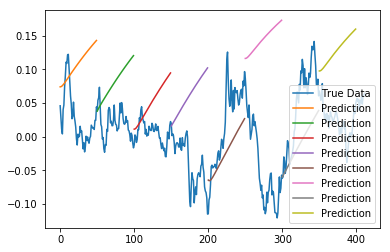

In [5]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

the result is not good, so i change the epoch argument

In [6]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=50,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/50
3523/3523 [==============================] - 3s - loss: 6.9568e-04 - val_loss: 4.2770e-04
Epoch 2/50
3523/3523 [==============================] - 2s - loss: 5.5471e-04 - val_loss: 3.6603e-04
Epoch 3/50
3523/3523 [==============================] - 2s - loss: 6.5822e-04 - val_loss: 5.3477e-04
Epoch 4/50
3523/3523 [==============================] - 2s - loss: 5.6989e-04 - val_loss: 3.7513e-04
Epoch 5/50
3523/3523 [==============================] - 2s - loss: 5.4072e-04 - val_loss: 3.3991e-04
Epoch 6/50
3523/3523 [==============================] - 2s - loss: 5.0526e-04 - val_loss: 3.3219e-04
Epoch 7/50
3523/3523 [==============================] - 2s - loss: 4.7843e-04 - val_loss: 3.1106e-04
Epoch 8/50
3523/3523 [==============================] - 2s - loss: 4.3439e-04 - val_loss: 3.9732e-04
Epoch 9/50
3523/3523 [==============================] - 2s - loss: 4.8541e-04 - val_loss: 2.6408e-04
Epoch 10/50
3523/3523 [=====================

yo


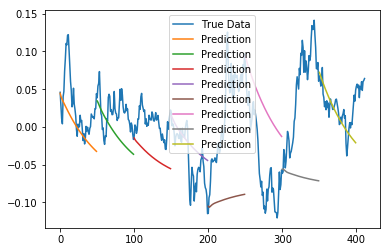

In [7]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

the result is better but also not good enough